# 7.a. Implementing our first Shallow Neural Network in Numpy, with a Forward Propagation

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (12/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Sklearn (tested on v0.0.post1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Removing unecessary warnings (optional, just makes notebook outputs more readable)
import warnings
warnings.filterwarnings("ignore")

### Mock dataset generation

Text

In [2]:
# All helper functions
min_surf = 40
max_surf = 200
def surface(min_surf, max_surf):
    return round(np.random.uniform(min_surf, max_surf), 2)
min_dist = 50
max_dist = 1000
def distance(min_dist, max_dist):
    return round(np.random.uniform(min_dist, max_dist), 2)
def price(surface, distance):
    return round((100000 + 14373*surface + (1000 - distance)*1286)*(1 + np.random.uniform(-0.1, 0.1)))/1000000
n_points = 100
def create_dataset(n_points, min_surf, max_surf, min_dist, max_dist):
    surfaces_list = np.array([surface(min_surf, max_surf) for _ in range(n_points)])
    distances_list = np.array([distance(min_dist, max_dist) for _ in range(n_points)])
    inputs = np.array([[s, d] for s, d in zip(surfaces_list, distances_list)])
    outputs = np.array([price(s, d) for s, d in zip(surfaces_list, distances_list)])
    return surfaces_list, distances_list, inputs, outputs

In [3]:
surfaces_list, distances_list, inputs, outputs = create_dataset(n_points, min_surf, max_surf, min_dist, max_dist)
print(surfaces_list.shape)
print(distances_list.shape)
print(inputs.shape)
print(outputs.shape)
print(inputs[0:10, :])
print(outputs[0:10])

(100,)
(100,)
(100, 2)
(100,)
[[153.58 422.44]
 [112.84 196.31]
 [101.12 867.37]
 [ 41.58 598.42]
 [ 60.34 401.68]
 [169.42 838.79]
 [152.92 694.49]
 [142.06 285.24]
 [ 99.7  399.39]
 [ 43.72 169.89]]
[3.349312 2.605887 1.754382 1.145941 1.793342 2.617085 2.883871 3.126306
 2.390757 1.654524]


### Visualising the linearity of the dataset

Text

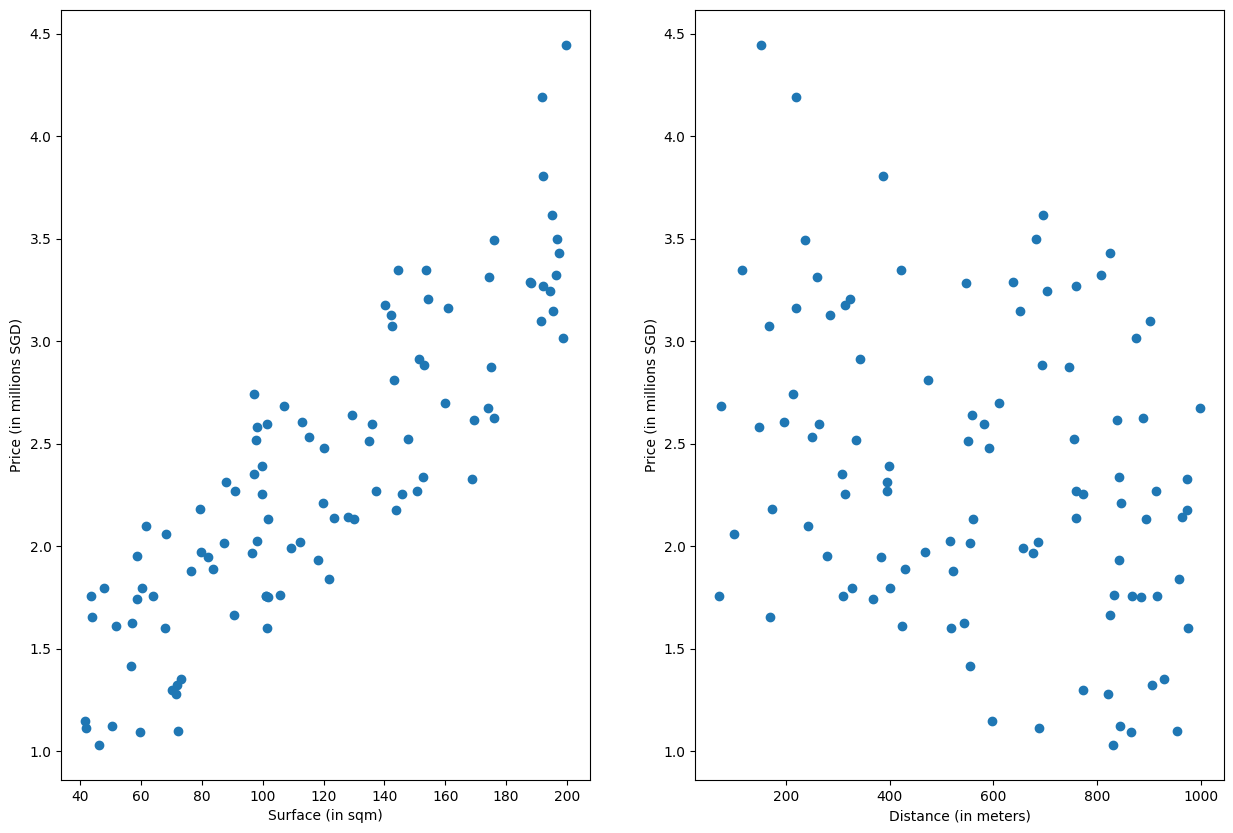

In [4]:
# Initialize matplotlib
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].scatter(surfaces_list, outputs)
axs[0].set_xlabel('Surface (in sqm)')
axs[0].set_ylabel('Price (in millions SGD)')
axs[1].scatter(distances_list, outputs)
axs[1].set_xlabel('Distance (in meters)')
axs[1].set_ylabel('Price (in millions SGD)')
# Display
plt.show()

Text

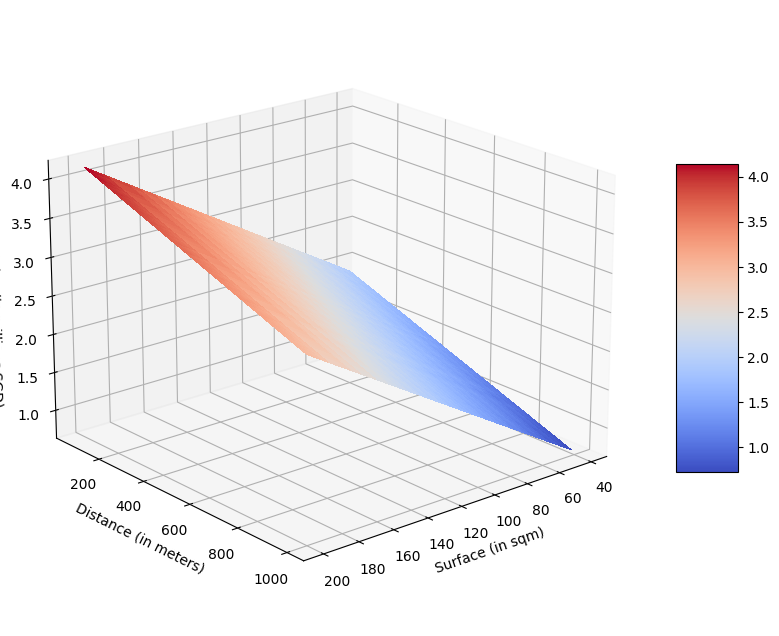

In [5]:
# Initialize plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (12, 8))
# Rework inputs and outputs as meshgrid
X, Y = np.meshgrid(sorted(surfaces_list), sorted(distances_list))
Z = np.round((100000 + 14373*X + (1000 - Y)*1286))/1000000
# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
# Axis labels
ax.set_xlabel('Surface (in sqm)')
ax.set_ylabel('Distance (in meters)')
ax.set_zlabel('Average Price (in millions SGD)')
# Rotate display around Z-axis
ax.view_init(20, 50)
# Display colorbar for Z values
fig.colorbar(surf, shrink = 0.5, aspect = 5)
# Show
plt.show()

### First model

Text

In [6]:
W = np.array([[14373/1000000], [-1286/1000000]])
b = np.ones(shape = (1, 1))*1.386 # 100000/1000000 + 1000*1286/1000000
Z = np.matmul(inputs, W)
pred = Z + b
print(inputs.shape)
print(W.shape)
print(b.shape)
print(Z.shape)
print(pred.shape)
print(outputs.shape)

(100, 2)
(2, 1)
(1, 1)
(100, 1)
(100, 1)
(100,)


In [7]:
print(pred[0:5, :])
print(outputs[0:5])

[[3.0501475 ]
 [2.75539466]
 [1.72395994]
 [1.21406122]
 [1.73670634]]
[3.349312 2.605887 1.754382 1.145941 1.793342]


### Defining a first Neural Network class, without any hidden layer and a forward propagation method

Text

In [8]:
class SimpleNeuralNet():
    
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
    def forward(self, x):
        Z = np.matmul(x, self.W)
        pred = Z + self.b
        return pred
    
    def MSE_loss(self, inputs, outputs):
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        losses = (pred - outputs_re)**2
        loss = np.sum(losses)/outputs.shape[0]
        return loss

Text

In [9]:
simple_neural_net = SimpleNeuralNet(W = np.array([[14373/1000000], [-1286/1000000]]), \
                                    b = np.ones(shape = (1, 1))*1.386)
print(simple_neural_net.__dict__)

{'W': array([[ 0.014373],
       [-0.001286]]), 'b': array([[1.386]])}


In [10]:
pred = simple_neural_net.forward(inputs)
print(pred)

[[3.0501475 ]
 [2.75539466]
 [1.72395994]
 [1.21406122]
 [1.73670634]
 [2.74238972]
 [2.69080502]
 [3.06100974]
 [2.30537256]
 [1.79590902]
 [2.11377215]
 [1.96161269]
 [3.86071706]
 [2.61572425]
 [2.99515205]
 [3.35852142]
 [1.89960532]
 [3.18742804]
 [1.58892391]
 [2.13210893]
 [2.30398248]
 [2.53656717]
 [2.36241109]
 [0.97726122]
 [1.69312726]
 [3.414679  ]
 [3.65289344]
 [4.05970484]
 [2.41605102]
 [2.83311245]
 [2.18401414]
 [1.83200009]
 [2.50579929]
 [1.62619987]
 [2.50452111]
 [1.10460827]
 [3.33521539]
 [1.9846844 ]
 [2.72177725]
 [1.65007837]
 [2.02212771]
 [3.17130913]
 [2.23561201]
 [2.35187855]
 [2.49527551]
 [3.27459548]
 [1.58254242]
 [1.81261079]
 [2.18379511]
 [2.56021719]
 [1.92277774]
 [3.55805594]
 [3.26505827]
 [3.61285401]
 [1.4006789 ]
 [2.38441753]
 [2.10451703]
 [2.82535876]
 [1.92661033]
 [1.65857893]
 [3.11916925]
 [1.91650932]
 [1.24140343]
 [1.35332996]
 [2.10976193]
 [3.16458139]
 [2.37803381]
 [2.97966332]
 [2.52290195]
 [3.29740766]
 [1.86838885]
 [3.11

In [11]:
loss = simple_neural_net.MSE_loss(inputs, outputs)
print(loss)

0.019237401430404623


### On the impact of parameters W and b

Text

In [12]:
W_model1 = np.array([[14373/1000000], [-1286/1000000]])
b_model1 = np.ones(shape = (1, 1))*1.386 # 100000/1000000 + 1000*1286/1000000
simple_neural_net1 = SimpleNeuralNet(W = W_model1, b = b_model1)
loss1 = simple_neural_net1.MSE_loss(inputs, outputs)
print(loss1)

0.019237401430404623


In [13]:
W_model2 = np.array([[20000/1000000], [-800/1000000]])
b_model2 = np.ones(shape = (1, 1))*1.1 # 100000/1000000 + 1000*1286/1000000
simple_neural_net2 = SimpleNeuralNet(W = W_model2, b = b_model2)
loss2 = simple_neural_net2.MSE_loss(inputs, outputs)
print(loss2)

0.54581785177667


In [14]:
W_model3 = np.array([[30000/1000000], [-400/1000000]])
b_model3 = np.ones(shape = (1, 1))*0.7 # 100000/1000000 + 1000*1286/1000000
simple_neural_net3 = SimpleNeuralNet(W = W_model3, b = b_model3)
loss3 = simple_neural_net3.MSE_loss(inputs, outputs)
print(loss3)

3.4603004003089097


### Defining a Neural Network class, without a single hidden layer and a forward propagation method

Text

In [15]:
class ShallowNeuralNet():
    
    def __init__(self, n_x, n_h, n_y):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.W1 = np.random.randn(n_x, n_h)*0.1
        self.b1 = np.random.randn(1, n_h)*0.1
        self.W2 = np.random.randn(n_h, n_y)*0.1
        self.b2 = np.random.randn(1, n_y)*0.1
        
    def forward(self, x):
        Z1 = np.matmul(x, self.W1)
        Z1_b = Z1 + self.b1
        Z2 = np.matmul(Z1_b, self.W2)
        Z2_b = Z2 + self.b2
        return Z2_b
    
    def MSE_loss(self, inputs, outputs):
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        losses = (pred - outputs_re)**2
        loss = np.sum(losses)/outputs.shape[0]
        return loss

In [16]:
# Define neural network structure
n_x = 2
n_h = 4
n_y = 1
shallow_neural_net = ShallowNeuralNet(n_x, n_h, n_y)
print(shallow_neural_net.__dict__)

{'n_x': 2, 'n_h': 4, 'n_y': 1, 'W1': array([[-0.15908367, -0.0145447 , -0.00451637, -0.00935178],
       [-0.07825821, -0.16947076, -0.07088093, -0.03377685]]), 'b1': array([[ 0.1356778 , -0.05367622,  0.12217177, -0.09829482]]), 'W2': array([[ 0.02532593],
       [-0.06650669],
       [-0.11307874],
       [ 0.02422797]]), 'b2': array([[-0.07342706]])}


In [17]:
pred = shallow_neural_net.forward(inputs)
print(pred.shape)
print(outputs.shape)
print(pred[0:5])
print(outputs[0:5])

(100, 1)
(100,)
[[ 6.45506014]
 [ 2.84029006]
 [13.9357767 ]
 [ 9.66730318]
 [ 6.37178894]]
[3.349312 2.605887 1.754382 1.145941 1.793342]


In [18]:
loss = shallow_neural_net.MSE_loss(inputs, outputs)
print(loss)

66.11845092694017


In [19]:
np.random.seed(963) 
shallow_neural_net1 = ShallowNeuralNet(n_x, n_h, n_y)
loss1 = shallow_neural_net1.MSE_loss(inputs, outputs)
shallow_neural_net2 = ShallowNeuralNet(n_x, n_h, n_y)
loss2 = shallow_neural_net2.MSE_loss(inputs, outputs)
shallow_neural_net3 = ShallowNeuralNet(n_x, n_h, n_y)
loss3 = shallow_neural_net3.MSE_loss(inputs, outputs)
shallow_neural_net4 = ShallowNeuralNet(n_x, n_h, n_y)
loss4 = shallow_neural_net4.MSE_loss(inputs, outputs)
print(loss1, loss2, loss3, loss4)

20.28867461716912 59.91723277645874 5.077566363645048 0.19653476853651103
